In [14]:
! pip install openpyxl

  Using cached openpyxl-3.0.7-py2.py3-none-any.whl (243 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import log
from pandas import Series

In [2]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels as sm

In [4]:
# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
from datetime import datetime
import subprocess
%matplotlib inline

In [5]:
data = pd.read_excel("df.xlsx",skiprows=list(range(0,10)), index_col=0, parse_dates=True)
data

,GOLDAMGBD228NLBM
observation_date,
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-15,1832.00
2021-07-16,1822.00
2021-07-19,1803.25


In [6]:
start_date = data.index[0]
end_date = data.index[-1]
dates = pd.date_range(start_date, end_date)
missing = []
nan_data = []

for date in dates:
    if date not in data.index:
        missing.append(date)
        nan_data.append(np.nan)
        
df = pd.DataFrame({"GOLDAMGBD228NLBM": nan_data}, index= missing)

df

,GOLDAMGBD228NLBM
1968-04-06,NaN
1968-04-07,NaN
1968-04-13,NaN
1968-04-14,NaN
1968-04-20,NaN
...,...
2021-07-04,NaN
2021-07-10,NaN
2021-07-11,NaN
2021-07-17,NaN


In [7]:
total_df = pd.concat([data, df])
total_df.sort_index(inplace= True)
total_df

,GOLDAMGBD228NLBM
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-17,NaN
2021-07-18,NaN
2021-07-19,1803.25
2021-07-20,1815.30


In [8]:
total_df.isnull().sum()

GOLDAMGBD228NLBM    5993
dtype: int64

In [9]:
df = total_df.interpolate(method ='linear', limit_direction ='forward', limit = 100)
df.isnull().sum()

GOLDAMGBD228NLBM    0
dtype: int64

In [10]:
df

,GOLDAMGBD228NLBM
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-17,1815.75
2021-07-18,1809.50
2021-07-19,1803.25
2021-07-20,1815.30


In [11]:
d = {'date': df.index, 'gold_price':df["GOLDAMGBD228NLBM"]}
df1 = pd.DataFrame(data=d)
df1.reset_index(inplace = True, drop = True)

In [12]:
df1

,date,gold_price
0,1968-04-01,38.00
1,1968-04-02,37.60
2,1968-04-03,37.70
3,1968-04-04,36.70
4,1968-04-05,37.20
...,...,...
19465,2021-07-17,1815.75
19466,2021-07-18,1809.50
19467,2021-07-19,1803.25
19468,2021-07-20,1815.30


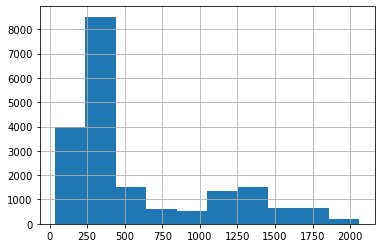

In [13]:
df1['gold_price'].hist()
plt.show()

In [14]:
log_transform = log(df1['gold_price'])
print(min(log_transform), max(log_transform))

3.5488987378095067 7.631189152146955


E:\gold_price\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


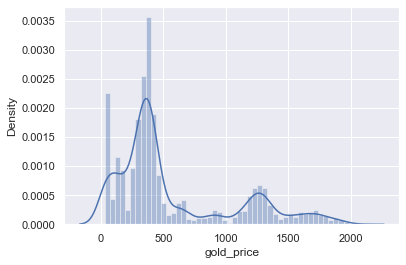

In [15]:
sns.set()
sns.distplot(df1['gold_price'])
plt.show()

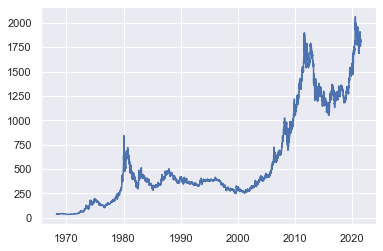

In [16]:
plt.plot(df1['date'], df1['gold_price'])
plt.show()

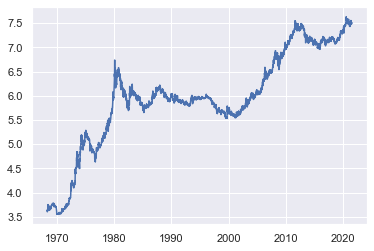

In [17]:
plt.plot(df1['date'], log_transform)
plt.show()

# Data Exploration

## Select Date Range - 10 years 2010-2020

In [18]:
def extract_data(start_date,end_date):
    return df1[(df1.date>=start_date)&(df1.date<=end_date)]

In [19]:
start_date = "2010-01-01"
end_date = "2020-12-31"
dfq= extract_data(start_date, end_date);
dfq.head()

,date,gold_price
15250,2010-01-01,1106.25
15251,2010-01-02,1108.50
15252,2010-01-03,1110.75
15253,2010-01-04,1113.00
15254,2010-01-05,1125.25


In [20]:
dfq.size

8036

### Seasonality

Yearly comparision for 5 years

### Year -2015

In [21]:
start_date = "2015-01-01"
end_date = "2015-12-31"
df_2015= extract_data(start_date, end_date);
df_2015.head()

,date,gold_price
17076,2015-01-01,1191.750000
17077,2015-01-02,1184.250000
17078,2015-01-03,1186.833333
17079,2015-01-04,1189.416667
17080,2015-01-05,1192.000000


In [22]:
start_date = "2016-01-01"
end_date = "2016-12-31"
df_2016= extract_data(start_date, end_date);
df_2016.head()

,date,gold_price
17441,2016-01-01,1064.8625
17442,2016-01-02,1067.4750
17443,2016-01-03,1070.0875
17444,2016-01-04,1072.7000
17445,2016-01-05,1078.0000


In [23]:
start_date = "2017-01-01"
end_date = "2017-12-31"
df_2017= extract_data(start_date, end_date);
df_2017.head()

,date,gold_price
17807,2017-01-01,1153.8750
17808,2017-01-02,1151.2625
17809,2017-01-03,1148.6500
17810,2017-01-04,1165.9000
17811,2017-01-05,1173.0500


In [24]:
start_date = "2018-01-01"
end_date = "2018-12-31"
df_2018= extract_data(start_date, end_date);
df_2018.head()

,date,gold_price
18172,2018-01-01,1308.725
18173,2018-01-02,1312.800
18174,2018-01-03,1314.600
18175,2018-01-04,1313.700
18176,2018-01-05,1317.900


In [25]:
start_date = "2019-01-01"
end_date = "2019-12-31"
df_2019= extract_data(start_date, end_date);
df_2019.head()

,date,gold_price
18537,2019-01-01,1284.425000
18538,2019-01-02,1287.200000
18539,2019-01-03,1287.950000
18540,2019-01-04,1290.350000
18541,2019-01-05,1290.733333


In [26]:
start_date = "2020-01-01"
end_date = "2020-12-31"
df_2020= extract_data(start_date, end_date);
#df_2020=df_2020.set_index('date')
df_2020

,date,gold_price
18902,2020-01-01,1521.775000
18903,2020-01-02,1520.550000
18904,2020-01-03,1547.400000
18905,2020-01-04,1557.216667
18906,2020-01-05,1567.033333
...,...,...
19263,2020-12-27,1873.360000
19264,2020-12-28,1873.630000
19265,2020-12-29,1873.900000
19266,2020-12-30,1877.550000


In [27]:
df_2015.size

730

<ipython-input-28-e1ddd3e54f05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['date'] =pd.to_datetime(dfq.date)


Text(0.5, 1.0, 'Gold_Price')

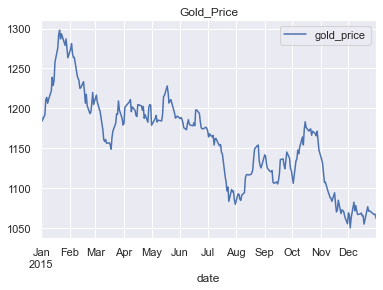

In [28]:
# Change "Date" as index and sort the data
df_2015['date'] =pd.to_datetime(dfq.date)
df_2015.sort_values('date')

df_2015.plot(x='date',y='gold_price')
plt.title('Gold_Price')

In [29]:
# only take Price column 
df1=dfq[['date','gold_price']]
# set date as index to make df series type 
df2 = df1.set_index('date')['gold_price']
type(df2)

pandas.core.series.Series

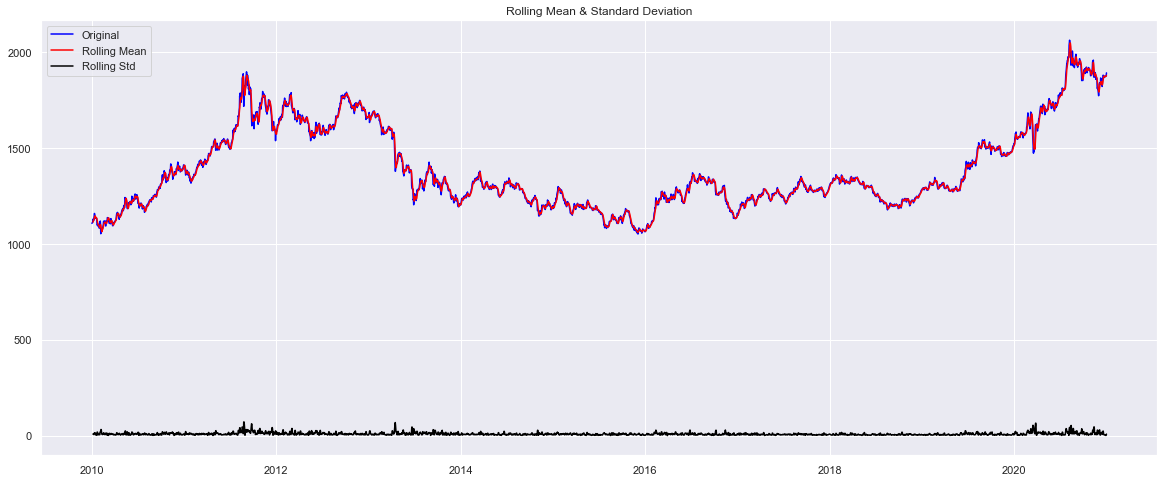

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -1.108866
p-value                           0.711523
#Lags Used                       13.000000
Number of Observations Used    4004.000000
Critical Value (1%)              -3.431984
Critical Value (5%)              -2.862262
Critical Value (10%)             -2.567154
dtype: float64


In [30]:
# Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20,8]

# Using ADF(Augmented Dickey Fuller) test to identify whether the series is stationary or not 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean() 
    rolstd = timeseries.rolling(window=5).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(80,10))
    plt.show(block=False)
    major_ticks = np.arange(0, 101, 20)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df2)

## Data Stationarity Transformation

### Exponential average

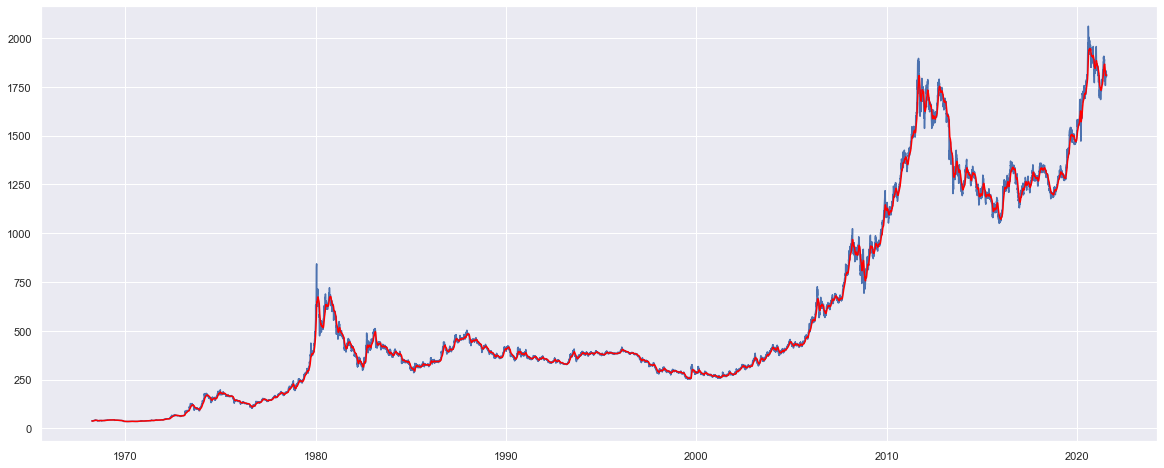

In [31]:
expwighted_avg = df.ewm(halflife=12).mean()
plt.plot(df)
plt.plot(expwighted_avg, color='red')

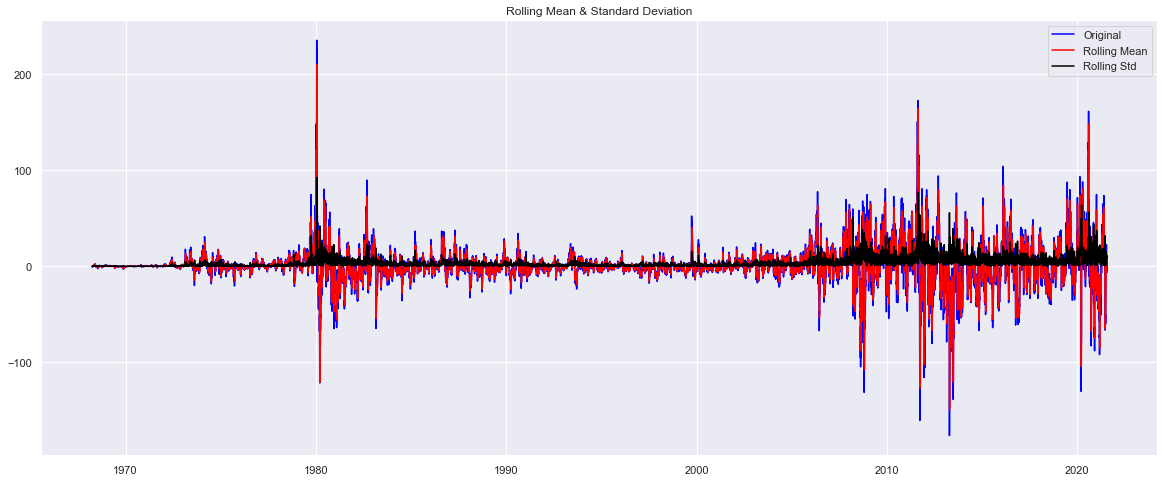

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                -1.714209e+01
p-value                        7.033759e-30
#Lags Used                     4.200000e+01
Number of Observations Used    1.942700e+04
Critical Value (1%)           -3.430687e+00
Critical Value (5%)           -2.861689e+00
Critical Value (10%)          -2.566849e+00
dtype: float64


In [32]:
ewma_diff = df - expwighted_avg
test_stationarity(ewma_diff)

### Differencing

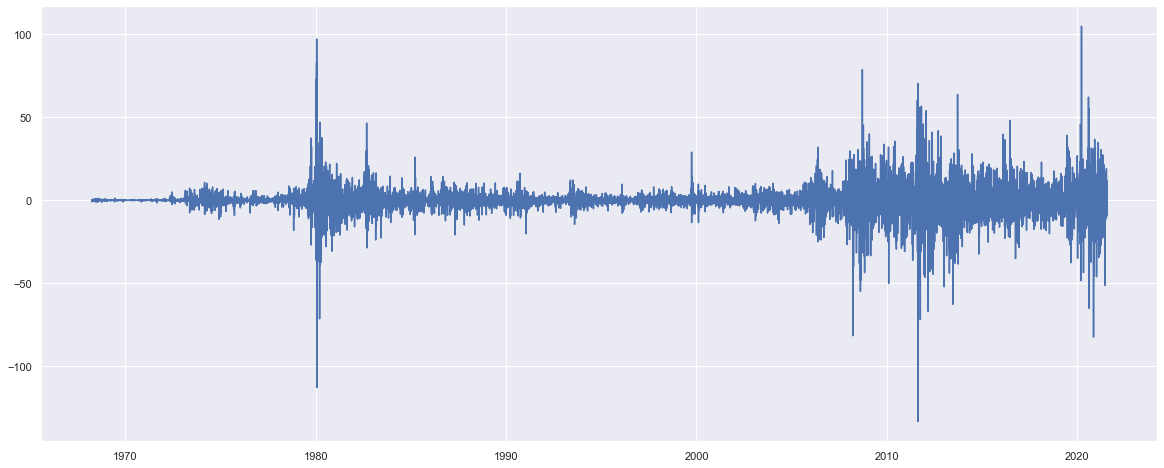

In [33]:
G_diff = df - df.shift()
plt.plot(G_diff)

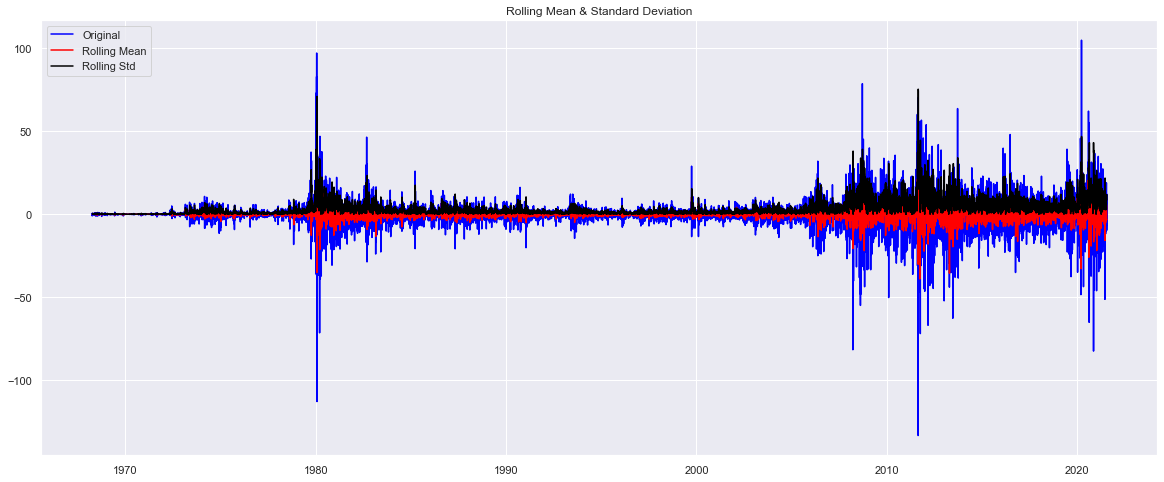

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -22.377336
p-value                            0.000000
#Lags Used                        41.000000
Number of Observations Used    19427.000000
Critical Value (1%)               -3.430687
Critical Value (5%)               -2.861689
Critical Value (10%)              -2.566849
dtype: float64


In [34]:
G_diff.dropna(inplace=True)
test_stationarity(G_diff)

### Decomposing

<ipython-input-35-ae2edda6d487>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df, freq=3)


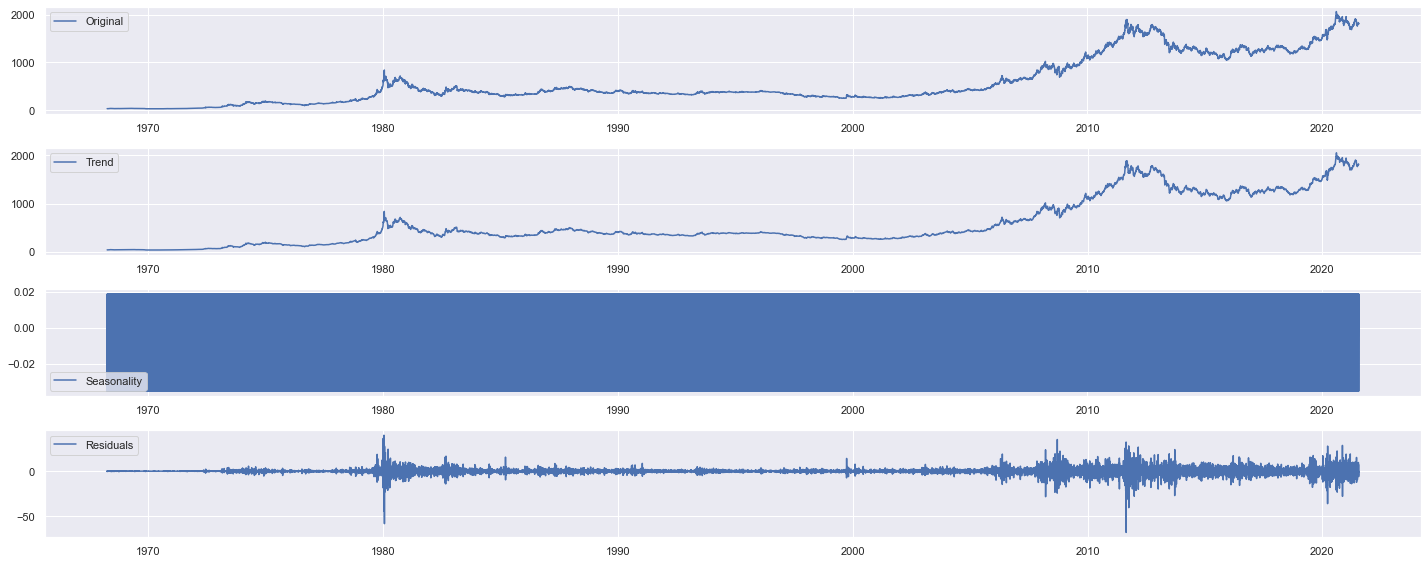

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

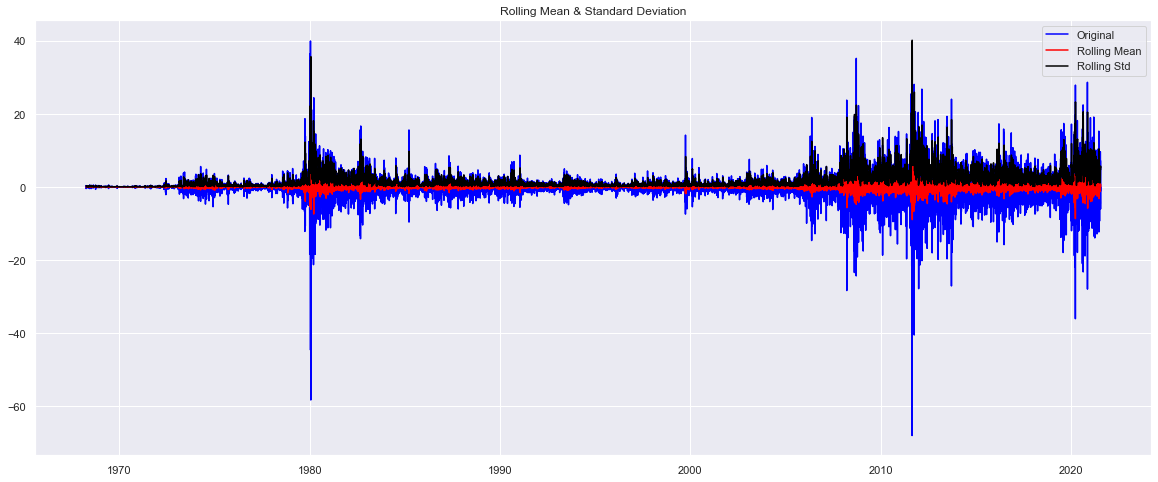

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -35.496787
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    19422.000000
Critical Value (1%)               -3.430687
Critical Value (5%)               -2.861689
Critical Value (10%)              -2.566849
dtype: float64


In [36]:
G_decompose = residual
G_decompose.dropna(inplace=True)
test_stationarity(G_decompose)

# 2020

<ipython-input-37-5e40fb68fadf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['date'] =pd.to_datetime(dfq.date)


Text(0.5, 1.0, 'Gold_Price')

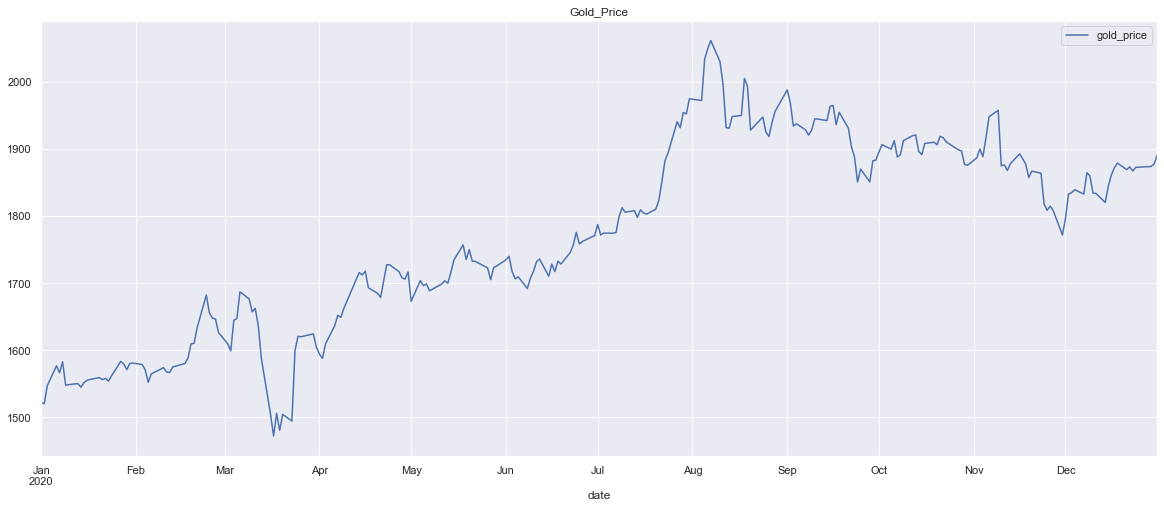

In [37]:
# Change "Date" as index and sort the data
df_2020['date'] =pd.to_datetime(dfq.date)
df_2020.sort_values('date')

df_2020.plot(x='date',y='gold_price')
plt.title('Gold_Price')

In [38]:
# only take Price column 
df1=df_2020[['date','gold_price']]
# set date as index to make df series type 
df2 = df1.set_index('date')['gold_price']
type(df2)

pandas.core.series.Series

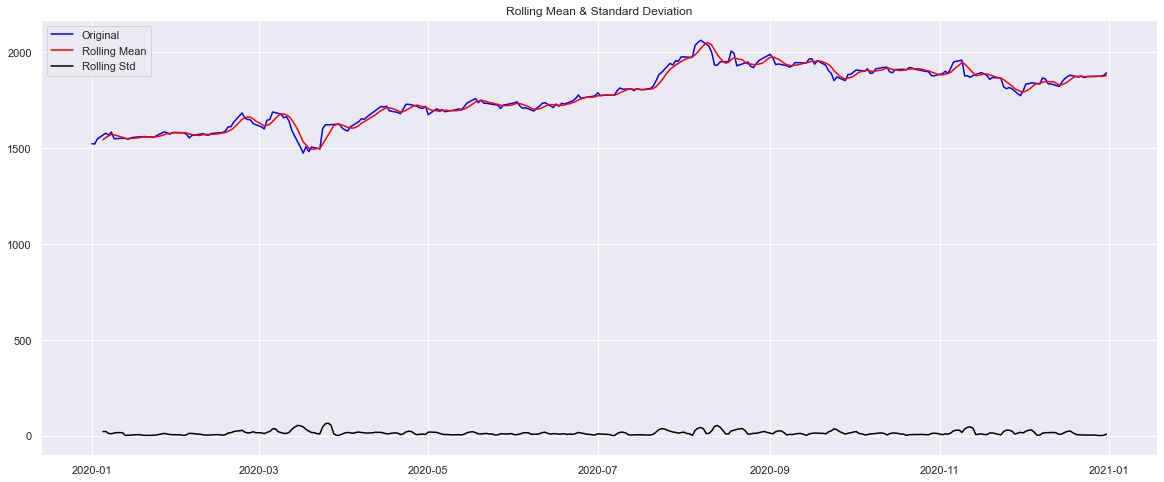

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                  -1.740097
p-value                          0.410581
#Lags Used                       1.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


In [39]:
test_stationarity(df2)

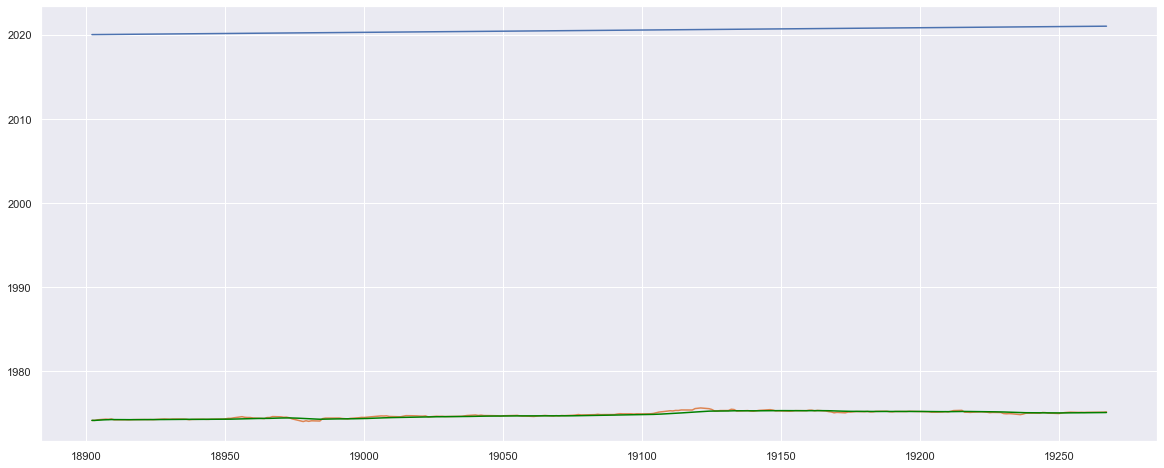

In [40]:
expwighted_avg = df_2020.ewm(halflife=12).mean()
plt.plot(df_2020)
plt.plot(expwighted_avg, color='green')

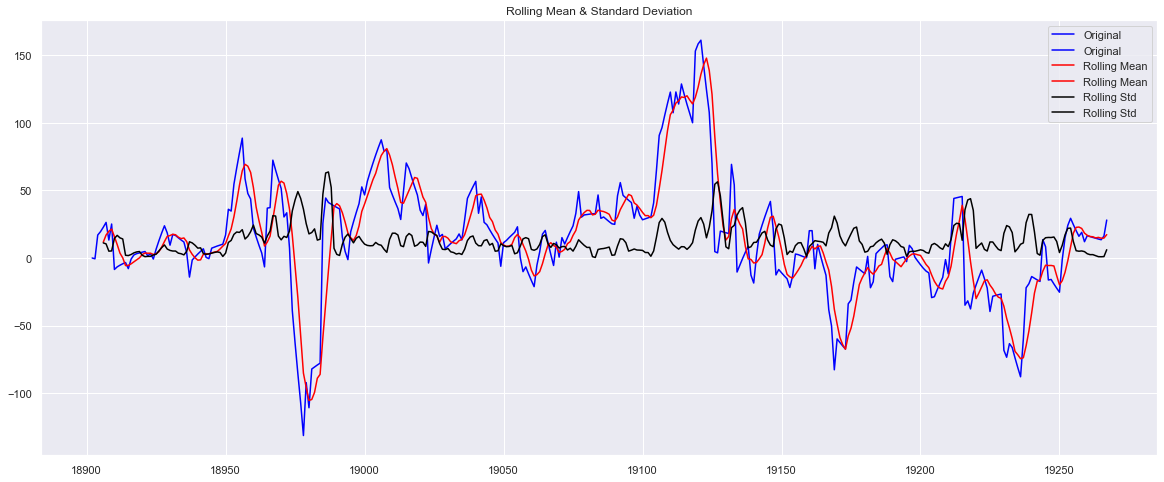

<Figure size 5760x720 with 0 Axes>

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [41]:
ewma_diff = df_2020 - expwighted_avg
test_stationarity(ewma_diff)

In [ ]:
G_diff = df_2020['gold_price'] - df_2020['gold_price'].shift()
plt.plot(G_diff)

In [ ]:
G_diff.dropna(inplace=True)
test_stationarity(G_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_2020['gold_price'], freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_2020['gold_price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Statistical Properties Descriptions

In [ ]:
# Change "Date" as index and sort the data
df['date'] =pd.to_datetime(df.date)
df.sort_values('date')

df.plot(x='date',y='gold_price')
plt.title('Gold_Price')

In [ ]:
hist = df[["gold_price"]].hist(bins=30)

In [ ]:
#ACF and PACF plots

series = df1['gold_price']
plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()

In [ ]:
# Define exploratory variables
# Finding moving average of past 3 days and 9 days
df1['S_1'] = df1['gold_price'].shift(1).rolling(window=3).mean()
df1['S_2'] = df1['gold_price'].shift(1).rolling(window=9).mean()
df1['gold_predict'] = df1['gold_price'].shift(-1)
df1 = df1.dropna()
X = df1[['S_1', 'S_2']]
X.head()
plt.plot(df1['date'], df1['S_1'])
plt.plot(df1['date'], df1["S_2"])
plt.show()


In [ ]:
# dependent variable
y = df1['gold_predict']
y.shape

In [ ]:
X.shape

In [ ]:
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

In [ ]:
# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))

In [42]:
# Check stationarity
X = df1['gold_price']
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

result_of_adfuller = adfuller(df1['gold_price'])
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

mean1=1647.517213, mean2=1894.124590
variance1=5941.816041, variance2=3722.394678
ADF Statistic: -1.740097
p-value: 0.410581
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [43]:
# Now taking log transform
log_transform = log(df1['gold_price'])
result_of_adfuller = adfuller(log_transform)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.484997
p-value: 0.540920
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


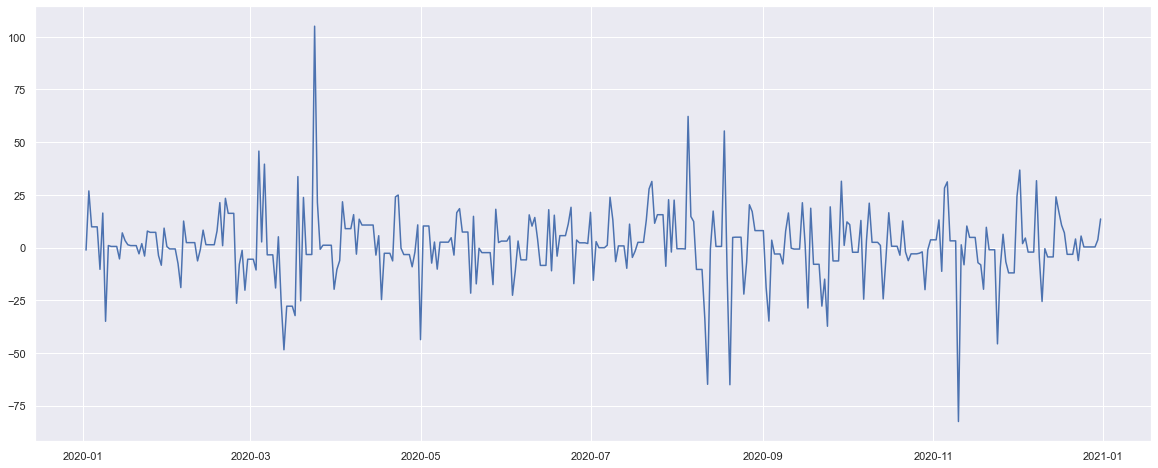

ADF Statistic: -16.704871
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [44]:
# To remove trends, differencing of order 1
k = df1['gold_price'].diff()
plt.plot(df1['date'], k)
plt.show()
# print(k.head())
k = k.dropna()

# check stationarity after differencing
result_of_adfuller = adfuller(k)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

## SARIMA Model

In [47]:
import itertools
#Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 5)
SARIMAX: (0, 0, 1) x (0, 1, 0, 5)
SARIMAX: (0, 1, 0) x (0, 1, 1, 5)
SARIMAX: (0, 1, 0) x (1, 0, 0, 5)


In [54]:
# Sort the index
df2 = df1.sort_values('date').set_index('date')['gold_price']

In [55]:
df2

date
1968-04-01      38.00
1968-04-02      37.60
1968-04-03      37.70
1968-04-04      36.70
1968-04-05      37.20
               ...   
2021-07-17    1815.75
2021-07-18    1809.50
2021-07-19    1803.25
2021-07-20    1815.30
2021-07-21    1805.90
Name: gold_price, Length: 19470, dtype: float64

In [56]:
train_data = df2[:18000] #train data around 90%
test_data = df2[1800:19470] #test data around 10%

In [57]:
import warnings
warnings.filterwarnings("ignore") 
import statsmodels.api as sm
AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 5) - AIC:284195.65126870055
SARIMAX(0, 0, 0)x(0, 0, 1, 5) - AIC:259812.36906221646
SARIMAX(0, 0, 0)x(0, 1, 0, 5) - AIC:146963.4768196297
SARIMAX(0, 0, 0)x(0, 1, 1, 5) - AIC:146929.15430688232
SARIMAX(0, 0, 0)x(1, 0, 0, 5) - AIC:146970.52669233072
SARIMAX(0, 0, 0)x(1, 0, 1, 5) - AIC:146964.80784593977
SARIMAX(0, 0, 0)x(1, 1, 0, 5) - AIC:146936.32555628056
SARIMAX(0, 0, 0)x(1, 1, 1, 5) - AIC:146931.2188096638
SARIMAX(0, 0, 0)x(2, 0, 0, 5) - AIC:146936.13486726471
SARIMAX(0, 0, 0)x(2, 0, 1, 5) - AIC:146938.19924813582
SARIMAX(0, 0, 0)x(2, 1, 0, 5) - AIC:146902.3608207035
SARIMAX(0, 0, 0)x(2, 1, 1, 5) - AIC:146903.7858804465
SARIMAX(0, 0, 0)x(3, 0, 0, 5) - AIC:146902.13511709555
SARIMAX(0, 0, 0)x(3, 0, 1, 5) - AIC:146904.11265768108
SARIMAX(0, 0, 0)x(3, 1, 0, 5) - AIC:146866.19562679593
SARIMAX(0, 0, 0)x(3, 1, 1, 5) - AIC:146868.31529792649
SARIMAX(0, 0, 1)x(0, 0, 0, 5) - AIC:259420.6465559414
SARIMAX(0, 0, 1)x(0, 0, 1, 5) - AIC:237722.28609571158
SARIMAX(0, 0, 1

SARIMAX(2, 0, 1)x(1, 1, 0, 5) - AIC:121995.5888495058
SARIMAX(2, 0, 1)x(1, 1, 1, 5) - AIC:117204.18389496165
SARIMAX(2, 0, 1)x(2, 0, 0, 5) - AIC:121994.58644295938
SARIMAX(2, 0, 1)x(2, 0, 1, 5) - AIC:117280.23090284718
SARIMAX(2, 0, 1)x(2, 1, 0, 5) - AIC:120733.83748897901
SARIMAX(2, 0, 1)x(2, 1, 1, 5) - AIC:117075.01897492973
SARIMAX(2, 0, 1)x(3, 0, 0, 5) - AIC:120547.23560200351
SARIMAX(2, 0, 1)x(3, 0, 1, 5) - AIC:116450.18952186
SARIMAX(2, 0, 1)x(3, 1, 0, 5) - AIC:119616.04241150376
SARIMAX(2, 0, 1)x(3, 1, 1, 5) - AIC:117390.05241099288
SARIMAX(2, 1, 0)x(0, 0, 0, 5) - AIC:116374.19598774516
SARIMAX(2, 1, 0)x(0, 0, 1, 5) - AIC:116348.97926092503
SARIMAX(2, 1, 0)x(0, 1, 0, 5) - AIC:128491.8398313399
SARIMAX(2, 1, 0)x(0, 1, 1, 5) - AIC:116362.83560741044
SARIMAX(2, 1, 0)x(1, 0, 0, 5) - AIC:116343.46152236495
SARIMAX(2, 1, 0)x(1, 0, 1, 5) - AIC:116345.37187551557
SARIMAX(2, 1, 0)x(1, 1, 0, 5) - AIC:123449.85872939214
SARIMAX(2, 1, 0)x(1, 1, 1, 5) - AIC:116354.64939551883
SARIMAX(2, 1, 0

In [58]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 116249.5347763816 for model SARIMAX(3, 1, 1)x(3, 0, 1, 5)


In [59]:
# Fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

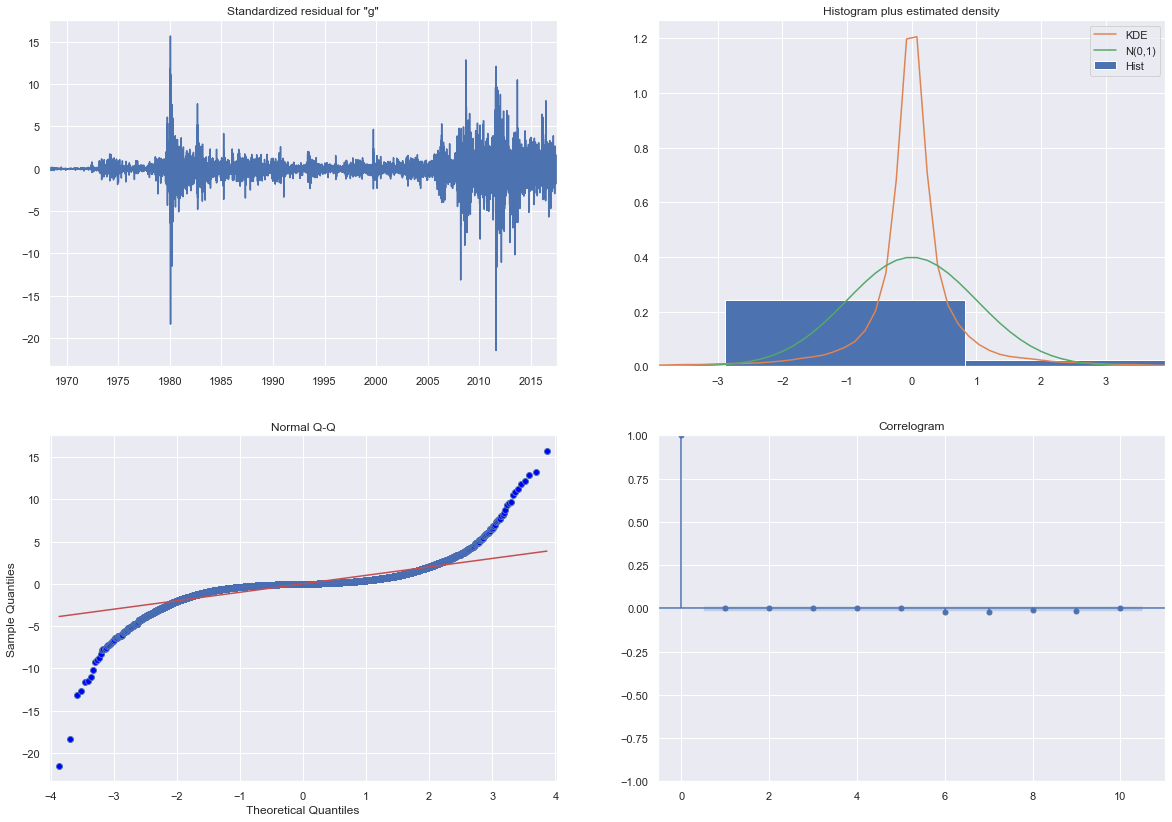

In [60]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()